# Modelos de Machine Learning con Datos de Vehículos 

## Clasificación: Predicción del tipo de carrocería

Precisión: 0.8914728682170543
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           4       0.12      1.00      0.22         1
           5       0.85      0.85      0.85        47
           6       0.94      0.92      0.93       180
           7       0.87      0.76      0.81        17

    accuracy                           0.89       258
   macro avg       0.53      0.65      0.54       258
weighted avg       0.91      0.89      0.90       258



c:\Users\LFery\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LFery\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LFery\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

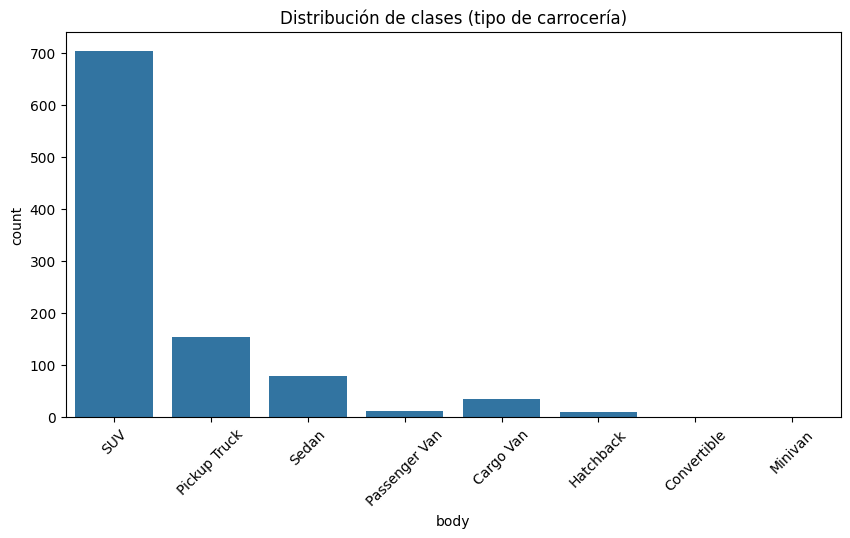

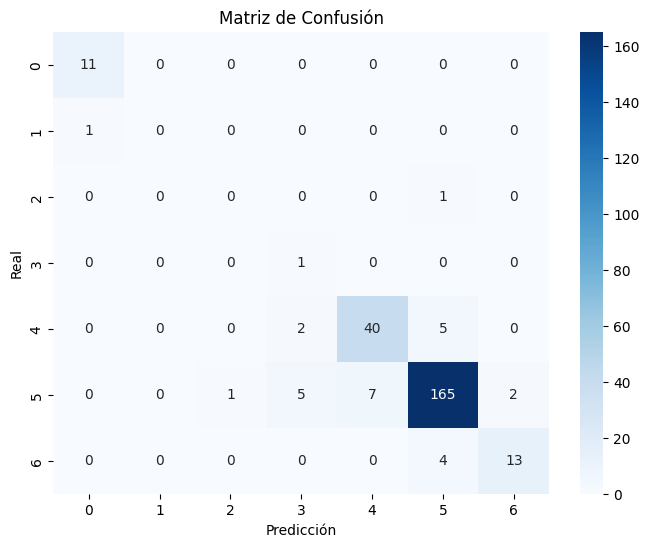

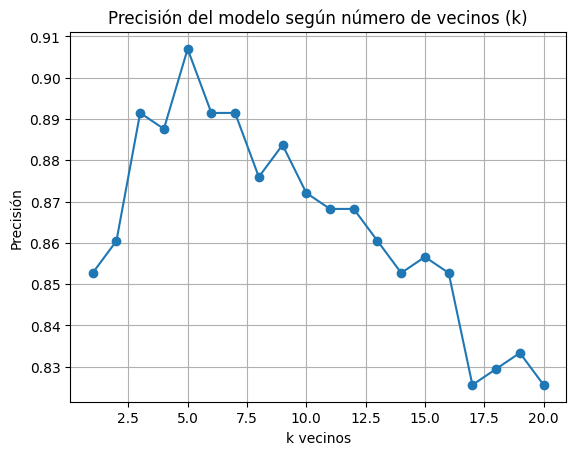

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


df = pd.read_csv("Vehicle Price.csv")

df = df[['year', 'mileage', 'cylinders', 'doors', 'fuel', 'drivetrain', 'body']].dropna()


df['fuel'] = LabelEncoder().fit_transform(df['fuel'])
df['drivetrain'] = LabelEncoder().fit_transform(df['drivetrain'])
df['body'] = LabelEncoder().fit_transform(df['body'])

X = df.drop('body', axis=1)
y = df['body']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)


y_pred = model_knn.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



plt.figure(figsize=(10, 5))
sns.countplot(x='body', data=pd.read_csv("Vehicle Price.csv"))
plt.title("Distribución de clases (tipo de carrocería)")
plt.xticks(rotation=45)
plt.show()



cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.plot(range(1, 21), scores, marker='o')
plt.title("Precisión del modelo según número de vecinos (k)")
plt.xlabel("k vecinos")
plt.ylabel("Precisión")
plt.grid()
plt.show()

## Regresión: Predicción del precio del vehículo (`price`)

MSE: 198233171.53407186
R2 Score: 0.3219143035617923


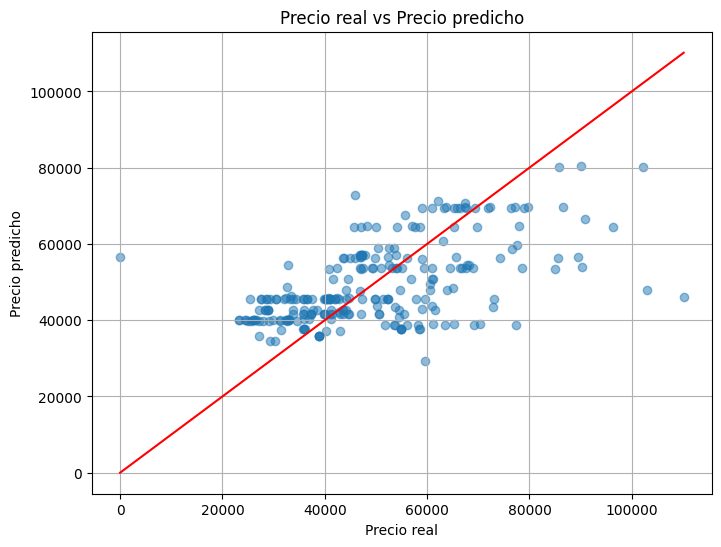

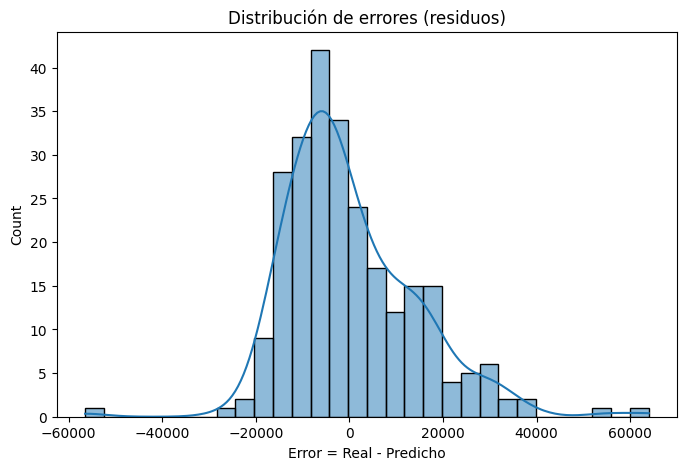

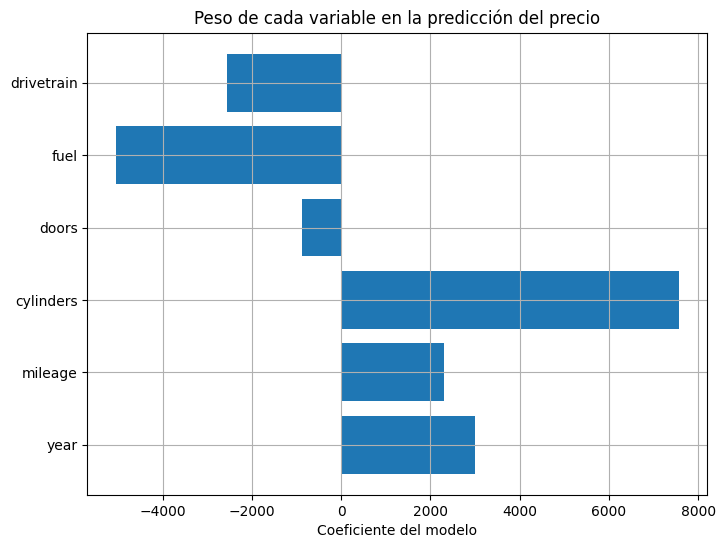

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Cargar nuevamente y seleccionar variables
df2 = pd.read_csv("Vehicle Price.csv")
df2 = df2[['year', 'mileage', 'cylinders', 'doors', 'fuel', 'drivetrain', 'price']].dropna()

# Codificar variables categóricas
df2['fuel'] = LabelEncoder().fit_transform(df2['fuel'])
df2['drivetrain'] = LabelEncoder().fit_transform(df2['drivetrain'])

X = df2.drop('price', axis=1)
y = df2['price']

# Escalar
X_scaled = scaler.fit_transform(X)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelo de regresión
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Evaluación
y_pred = model_lr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Precio real vs Precio predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # línea perfecta
plt.grid(True)
plt.show()


errores = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(errores, bins=30, kde=True)
plt.title("Distribución de errores (residuos)")
plt.xlabel("Error = Real - Predicho")
plt.show()



coef = model_lr.coef_
features = X.columns
plt.figure(figsize=(8, 6))
plt.barh(features, coef)
plt.title("Peso de cada variable en la predicción del precio")
plt.xlabel("Coeficiente del modelo")
plt.grid()
plt.show()


## Vehicular arbol de decisiones

Precisión: 0.8255813953488372
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.92      0.49      0.64        47
           6       0.81      0.99      0.89       180
           7       0.00      0.00      0.00        17

    accuracy                           0.83       258
   macro avg       0.39      0.35      0.36       258
weighted avg       0.77      0.83      0.78       258



c:\Users\LFery\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LFery\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LFery\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

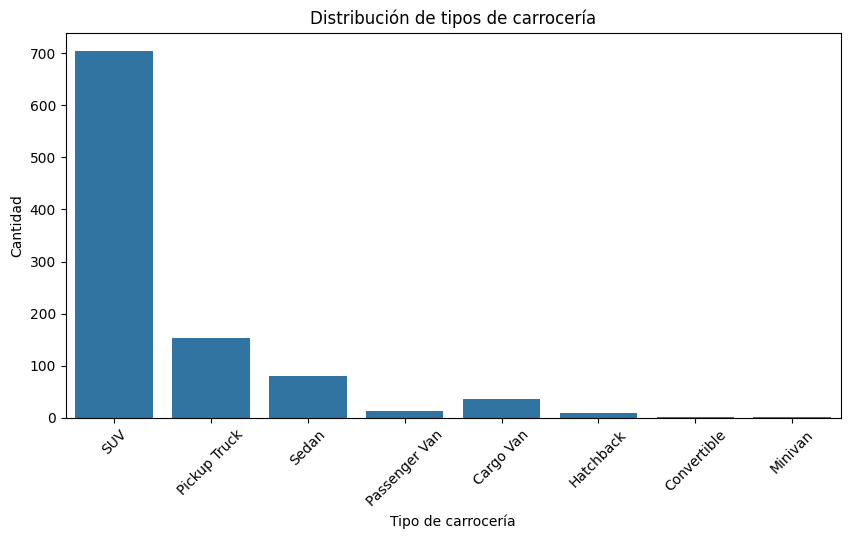

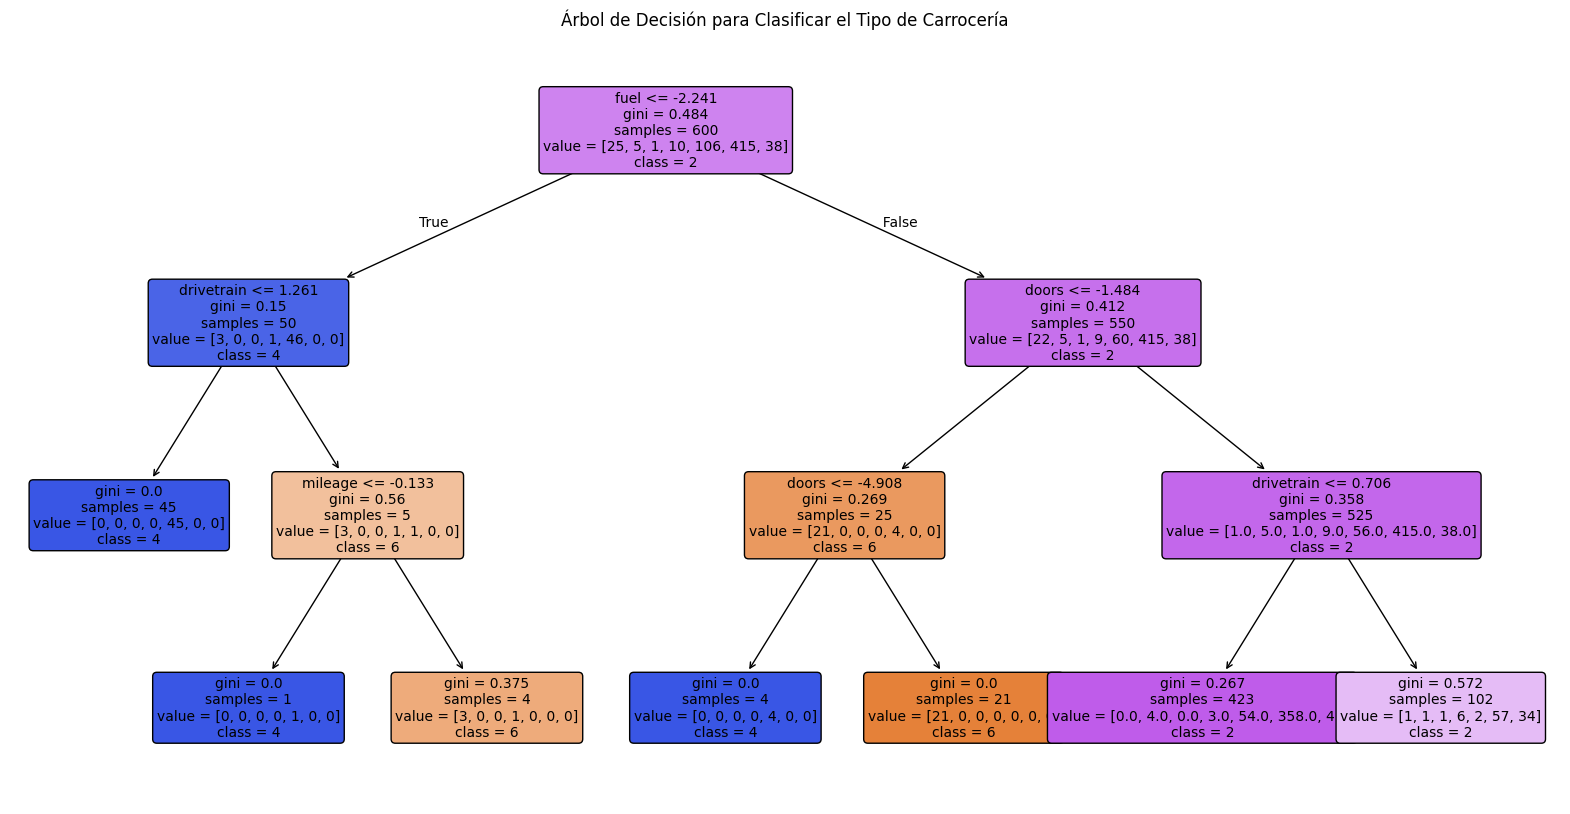

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns


# Cargar y preparar datos
df = pd.read_csv("Vehicle Price.csv")
df = df[['year', 'mileage', 'cylinders', 'doors', 'fuel', 'drivetrain', 'body']].dropna()

# Codificar variables categóricas
df['fuel'] = LabelEncoder().fit_transform(df['fuel'])
df['drivetrain'] = LabelEncoder().fit_transform(df['drivetrain'])
df['body'] = LabelEncoder().fit_transform(df['body'])

# Separar features y target
X = df.drop('body', axis=1)
y = df['body']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entrenar el modelo
model_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tree.fit(X_train, y_train)

# Evaluar
y_pred = model_tree.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



# Cargar datos crudos o antes de aplicar LabelEncoder
df_vis = pd.read_csv("Vehicle Price.csv")
plt.figure(figsize=(10, 5))
sns.countplot(x='body', data=df_vis)
plt.title("Distribución de tipos de carrocería")
plt.xlabel("Tipo de carrocería")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(20, 10))
plot_tree(
    model_tree,
    feature_names=X.columns,
    class_names=[str(c) for c in y.unique()],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión para Clasificar el Tipo de Carrocería")
plt.show()